# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Imports the OpenWeatherMap API key
from api_keys import weather_api_key

# Imports citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Ranges of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Creates a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Sets the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"


# Defines an empty list to fetch the weather data for each city
city_data = []

# Prints to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Creates counters
record_count = 1
set_count = 1

# Loops through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Groups cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Creates endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Logs the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Adds 1 to the record count
    record_count += 1

    # Runs an API request for each of the cities
    try:
        # Parses the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parses out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Appends the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skips the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicates that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | namibe
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | osorno
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | talnakh
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | tukrah
Processing Record 9 of Set 1 | queenstown
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | st. john's
Processing Record 12 of Set 1 | remire-montjoly
Processing Record 13 of Set 1 | west island
Processing Record 14 of Set 1 | taiohae
City not found. Skipping...
Processing Record 15 of Set 1 | bilibino
Processing Record 16 of Set 1 | port elizabeth
Processing Record 17 of Set 1 | margaret river
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | karema
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | barclayville
Processing Record 22 of Set 1 |

In [4]:
# Converts the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Shows Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [5]:
# Displays sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,namibe,-15.1961,12.1522,24.87,81,100,4.06,AO,1711735929
1,adamstown,-25.0660,-130.1015,23.54,71,97,12.74,PN,1711735795
2,osorno,-40.5667,-73.1500,18.47,48,40,4.12,CL,1711735533
3,port-aux-francais,-49.3500,70.2167,8.18,97,100,11.37,TF,1711735844
4,talnakh,69.4865,88.3972,-12.28,88,100,6.29,RU,1711735931


In [6]:
# Exports the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Reads the saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Displays the sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,namibe,-15.1961,12.1522,24.87,81,100,4.06,AO,1711735929
1,adamstown,-25.0660,-130.1015,23.54,71,97,12.74,PN,1711735795
2,osorno,-40.5667,-73.1500,18.47,48,40,4.12,CL,1711735533
3,port-aux-francais,-49.3500,70.2167,8.18,97,100,11.37,TF,1711735844
4,talnakh,69.4865,88.3972,-12.28,88,100,6.29,RU,1711735931


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

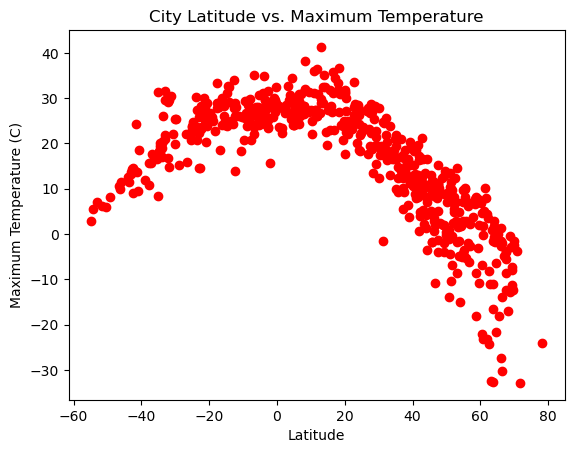

In [8]:
# Makes scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], c = 'red')
plt.title("City Latitude vs. Maximum Temperature")
plt.ylabel("Maximum Temperature (C)")
plt.xlabel("Latitude")

# Saves the figure
plt.savefig("../output_data/Fig1.png")

# Shows plot
plt.show()

#### Latitude Vs. Humidity

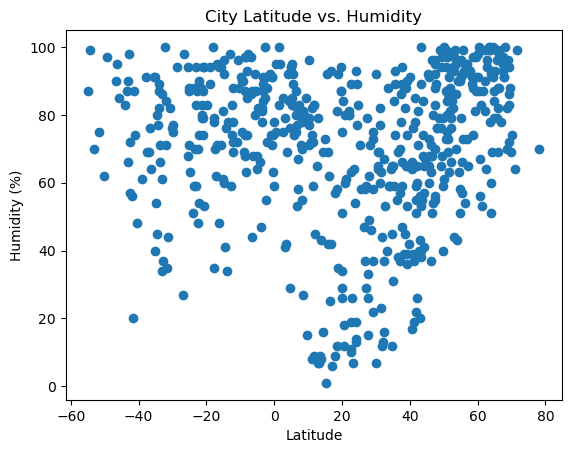

In [9]:
# Builds the scatter plots for latitude vs. humidity

plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")


# Saves the figure
plt.savefig("../output_data/Fig2.png")

# Shows plot
plt.show()

#### Latitude Vs. Cloudiness

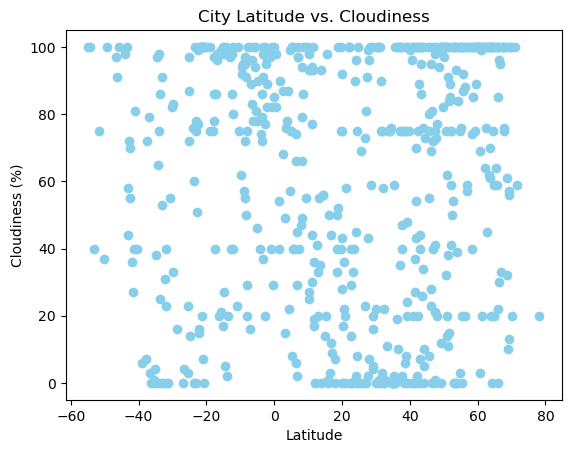

In [10]:
# Builds the scatter plots for latitude vs. cloudiness

plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], c = 'skyblue')
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# Saves the figure
plt.savefig("../output_data/Fig3.png")

# Shows plot
plt.show()

#### Latitude vs. Wind Speed Plot

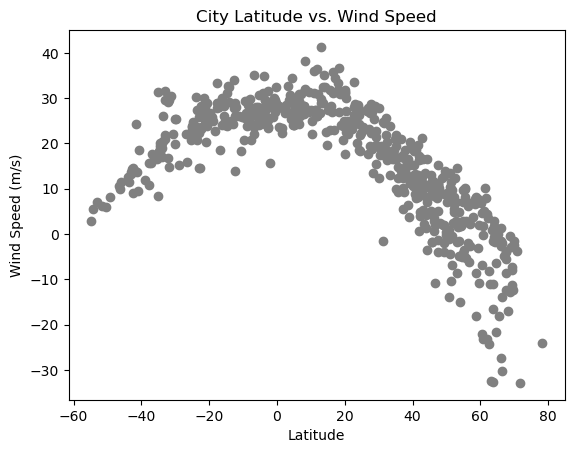

In [11]:
# Builds the scatter plots for latitude vs. wind speed

plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], c = "gray")
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")


# Saves the figure
plt.savefig("../output_data/Fig4.png")

# Shows plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Function to create Linear Regression plots
print(f'y = slope * Latitude + intercept')

y = slope * Latitude + intercept


In [13]:
# Creates a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0, :]

# Displays the sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,talnakh,69.4865,88.3972,-12.28,88,100,6.29,RU,1711735931
5,bethel,41.3712,-73.4140,12.21,37,0,5.66,US,1711735931
6,albany,42.6001,-73.9662,10.53,40,89,4.47,US,1711735719
7,tukrah,32.5341,20.5791,16.29,67,22,6.82,LY,1711735784
10,st. john's,47.5649,-52.7093,9.55,96,100,4.48,CA,1711735858


In [14]:
# Creates a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0, :]

# Displays the sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,namibe,-15.1961,12.1522,24.87,81,100,4.06,AO,1711735929
1,adamstown,-25.0660,-130.1015,23.54,71,97,12.74,PN,1711735795
2,osorno,-40.5667,-73.1500,18.47,48,40,4.12,CL,1711735533
3,port-aux-francais,-49.3500,70.2167,8.18,97,100,11.37,TF,1711735844
8,queenstown,-31.8976,26.8753,14.90,84,40,4.43,ZA,1711735933


###  Temperature vs. Latitude Linear Regression Plot

In [15]:
# Calculating linear regression values and predicting the y_values from the x_values for North_Hemisphere
slope, intercept, rval, pval, std = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
x_points = northern_hemi_df['Lat'].astype(int).min(), northern_hemi_df['Lat'].astype(int).max()
x_points = np.array(x_points)
y_pred = slope * x_points + intercept


# Forming the linear regression equation
equation = f'y = {slope:.2f}x + {intercept:.2f}'

The r-value is -0.874651997538139


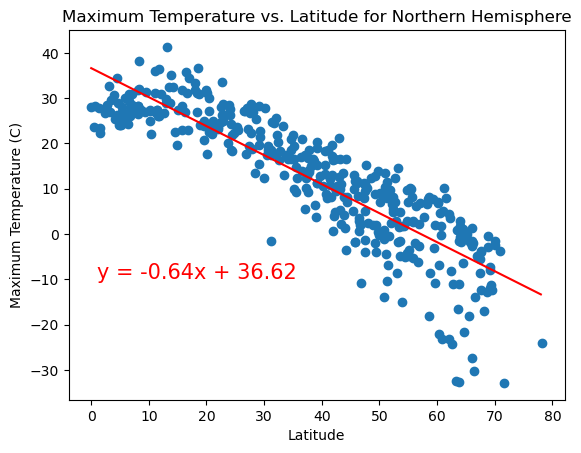

In [16]:
print(f'The r-value is {rval}')

# Linear regression on Northern Hemisphere

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.plot(x_points,y_pred, 'r')
plt.text(x = 1, y = -10, s = equation, fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (C)")
plt.title("Maximum Temperature vs. Latitude for Northern Hemisphere")


plt.show()

In [17]:
# Calculating linear regression values and predicting the y_values from the x_values for South_Hemisphere
slope, intercept, rval, pval, std = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
x_points = southern_hemi_df['Lat'].astype(int).min(), southern_hemi_df['Lat'].astype(int).max()
x_points = np.array(x_points)
y_pred = slope * x_points + intercept

# Forming the linear regression equation
equation = f'y = {slope:.2f}x + {intercept:.2f}'


The r-value is 0.7344225075548733


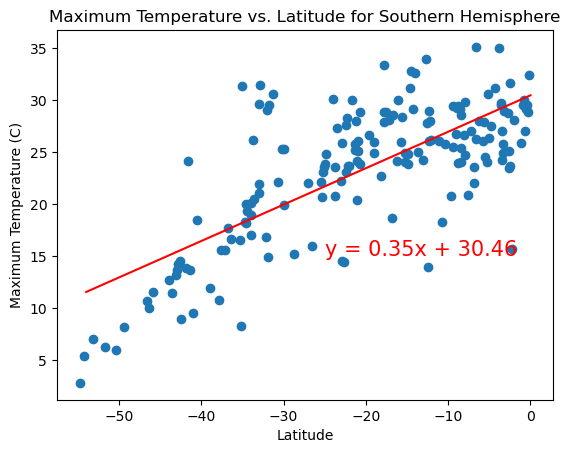

In [18]:
print(f'The r-value is {rval}')

# Linear regression on Southern Hemisphere

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.plot(x_points,y_pred, 'r')
plt.text(x = -25, y = 15, s = equation, fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (C)")
plt.title("Maximum Temperature vs. Latitude for Southern Hemisphere")

plt.show()

**Discussion about the linear relationship:** There is a negative correlation between the Latitude and the Maximum Temperature for the Northern Hemisphere. This means as one variable increases, the other variable decreases. For example, a higher Latitude means there will be a lower temperature. However, there seems to be a positive correlation between Latitude and Maximum Temperature for the Southern Hemisphere: As one variable increases, so does the other. 

### Humidity vs. Latitude Linear Regression Plot

In [19]:
# Calculating linear regression values and predicting the y_values from the x_values for North_Hemisphere
slope, intercept, rval, pval, std = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
x_points = northern_hemi_df['Lat'].astype(int).min(), northern_hemi_df['Lat'].astype(int).max()
x_points = np.array(x_points)
y_pred = slope * x_points + intercept


# Forming the linear regression equation
equation = f'y = {slope:.2f}x + {intercept:.2f}'

The r-value is 0.3364837203693246


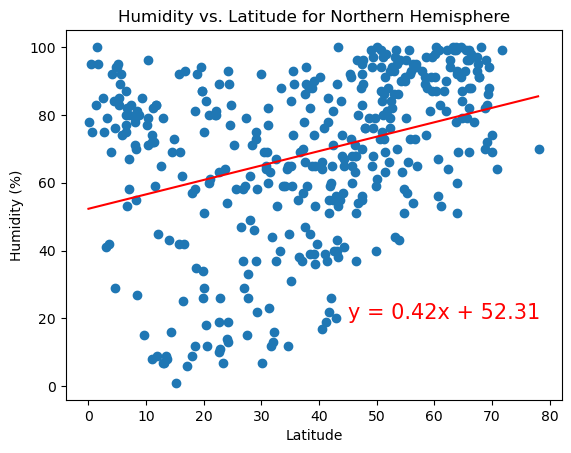

In [20]:
print(f'The r-value is {rval}')

# Linear regression on Northern Hemisphere

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.plot(x_points,y_pred, 'r')
plt.text(x = 45, y = 20, s = equation, fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs. Latitude for Northern Hemisphere")


plt.show()

In [21]:
# Calculating linear regression values and predicting the y_values from the x_values for South_Hemisphere
slope, intercept, rval, pval, std = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
x_points = southern_hemi_df['Lat'].astype(int).min(), southern_hemi_df['Lat'].astype(int).max()
x_points = np.array(x_points)
y_pred = slope * x_points + intercept

# Forming the linear regression equation
equation = f'y = {slope:.2f}x + {intercept:.2f}'


The r-value is 0.12542268413498298


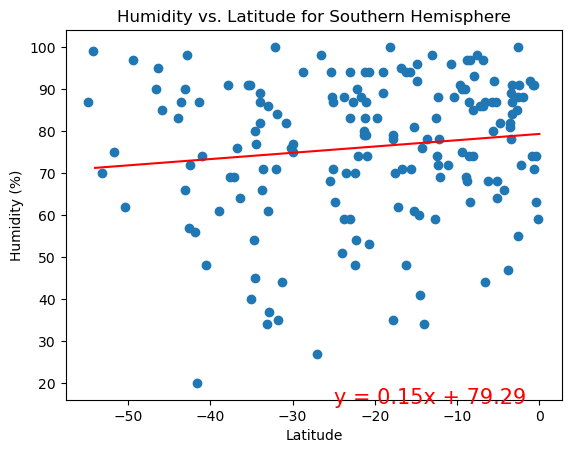

In [22]:
print(f'The r-value is {rval}')

# Linear regression on Southern Hemisphere

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.plot(x_points,y_pred, 'r')
plt.text(x = -25, y = 15, s = equation, fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs. Latitude for Southern Hemisphere")

plt.show()

**Discussion about the linear relationship:** Neither the Northern nor the Southern Hemisphere dataframes seem to indicate a correlation between Latitude and Humidity. The r-values for both are below 0.5 which shows a weak correlation coefficient. In other terms, the data for both hemispheres do not indicate a strong relationship between Latitude and Humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

In [23]:
# Calculating linear regression values and predicting the y_values from the x_values for North_Hemisphere
slope, intercept, rval, pval, std = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
x_points = northern_hemi_df['Lat'].astype(int).min(), northern_hemi_df['Lat'].astype(int).max()
x_points = np.array(x_points)
y_pred = slope * x_points + intercept


# Forming the linear regression equation
equation = f'y = {slope:.2f}x + {intercept:.2f}'

The r-value is 0.1635147187754454


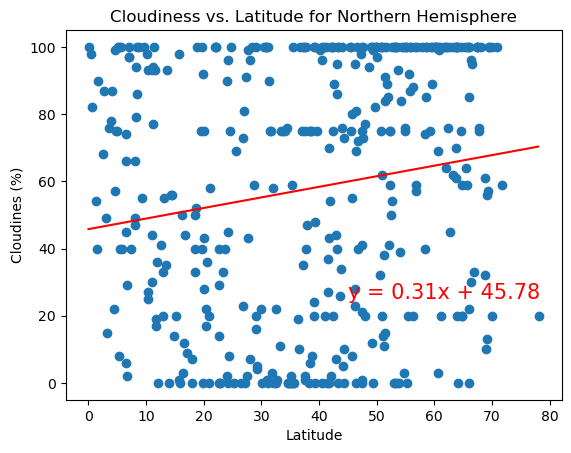

In [24]:
print(f'The r-value is {rval}')

# Linear regression on Northern Hemisphere

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.plot(x_points,y_pred, 'r')
plt.text(x = 45, y = 25, s = equation, fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudines (%)")
plt.title("Cloudiness vs. Latitude for Northern Hemisphere")


plt.show()

In [25]:
# Calculating linear regression values and predicting the y_values from the x_values for South_Hemisphere
slope, intercept, rval, pval, std = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
x_points = southern_hemi_df['Lat'].astype(int).min(), southern_hemi_df['Lat'].astype(int).max()
x_points = np.array(x_points)
y_pred = slope * x_points + intercept

# Forming the linear regression equation
equation = f'y = {slope:.2f}x + {intercept:.2f}'

The r-value is 0.24716947894344724


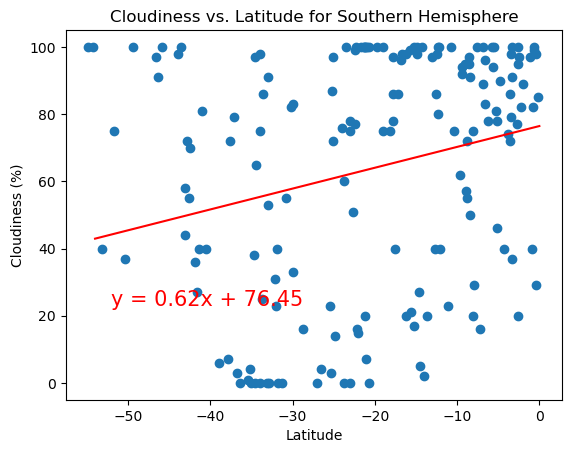

In [26]:
print(f'The r-value is {rval}')

# Linear regression on Southern Hemisphere

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.plot(x_points,y_pred, 'r')
plt.text(x = -52, y = 23, s = equation, fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness vs. Latitude for Southern Hemisphere")

plt.show()

**Discussion about the linear relationship:** Just like the relationship between Humidity and Latitude was not related, the same conclusion can be drawn for the relationship between Cloudiness and Latitude. The r-values for both hemispheres are very low and the regression lines do not seem to do a great job at representing the trend in the data points. It can be concluded that there does not appear to be a correlational relationship between Cloudiness and Latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

In [27]:
# Calculating linear regression values and predicting the y_values from the x_values for North_Hemisphere
slope, intercept, rval, pval, std = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
x_points = northern_hemi_df['Lat'].astype(int).min(), northern_hemi_df['Lat'].astype(int).max()
x_points = np.array(x_points)
y_pred = slope * x_points + intercept


# Forming the linear regression equation
equation = f'y = {slope:.2f}x + {intercept:.2f}'

The r-value is 0.049213747948566165


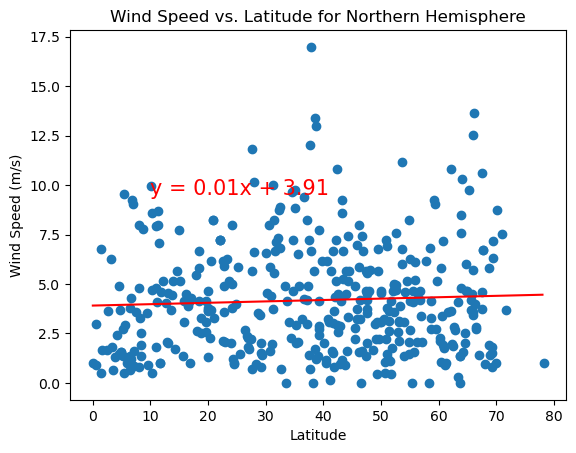

In [28]:
print(f'The r-value is {rval}')

# Linear regression on Northern Hemisphere

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.plot(x_points,y_pred, 'r')
plt.text(x = 10, y = 9.5, s = equation, fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Wind Speed vs. Latitude for Northern Hemisphere")


plt.show()

In [29]:
# Calculating linear regression values and predicting the y_values from the x_values for South_Hemisphere
slope, intercept, rval, pval, std = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
x_points = southern_hemi_df['Lat'].astype(int).min(), southern_hemi_df['Lat'].astype(int).max()
x_points = np.array(x_points)
y_pred = slope * x_points + intercept

# Forming the linear regression equation
equation = f'y = {slope:.2f}x + {intercept:.2f}'

The r-value is -0.34023874130266907


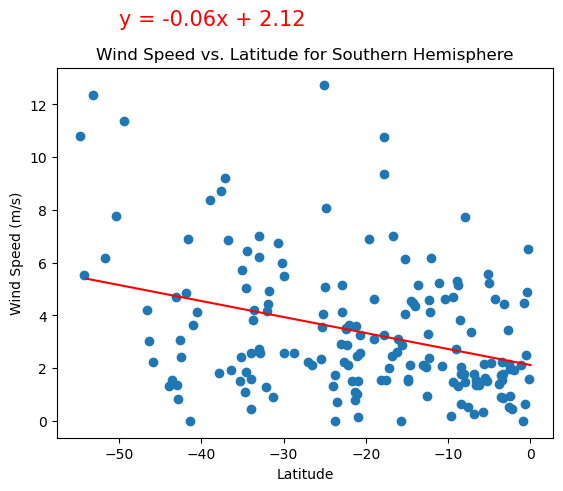

In [30]:
print(f'The r-value is {rval}')

# Linear regression on Southern Hemisphere

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.plot(x_points,y_pred, 'r')
plt.text(x = -50, y = 15, s = equation, fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Wind Speed vs. Latitude for Southern Hemisphere")

plt.show()

**Discussion about the linear relationship:** Both the lines for the relationship between Latitude and Wind Speed are negative, but the correlation does not seem to be very strong. The r-values are not below -0.5 and the regression lines do not seem to accurately represent the data points. This leads to the conclusion that there is not a strong correlational relationship between Wind Speed and Latitude for the Northern and the Southern Hemisphere data. 